# Without rolling average

Total nulls: 56
Dropping nulls...
                               SARIMAX Results                                
Dep. Variable:            total_sales   No. Observations:                 1913
Model:                 ARIMA(2, 1, 0)   Log Likelihood              -19239.646
Date:                Fri, 13 May 2022   AIC                          38485.293
Time:                        12:50:58   BIC                          38501.961
Sample:                             0   HQIC                         38491.427
                               - 1913                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0763      0.011      6.732      0.000       0.054       0.098
ar.L2         -0.2809      0.018    -15.505      0.000      -0.316      -0.245
sigma2      3.222e

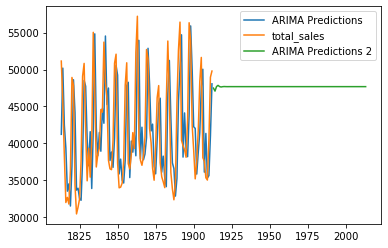

In [4]:
import statsmodels.api as sm
import pandas as pd

df = pd.read_csv('../data/processed/calendar_processed-May-13-2022.csv')
df = df["total_sales"]

print("Total nulls:", df.isnull().sum())
print("Dropping nulls...")
df = df.dropna()
model = sm.tsa.arima.ARIMA(df, order=(2, 1, 0))
results_ARIMA = model.fit()
print(results_ARIMA.summary())

print(df.shape)
train=df.iloc[:-100]
test=df.iloc[-100:]
print(train.shape,test.shape)

start=len(train)
end=len(train)+len(test)-1
pred=results_ARIMA.predict(start=start,end=end,typ='levels').rename('ARIMA Predictions')
pred.plot(legend=True)
test.plot(legend=True)

pred2=results_ARIMA.predict(start=len(df),end=len(df)+100,typ='levels').rename('ARIMA Predictions 2')
pred2.plot(legend=True)

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.01811D+01    |proj g|=  6.37363D-02

At iterate    5    f=  1.01414D+01    |proj g|=  9.95418D-03

At iterate   10    f=  1.01393D+01    |proj g|=  9.55565D-05

At iterate   15    f=  1.01393D+01    |proj g|=  5.73631D-04

At iterate   20    f=  1.01390D+01    |proj g|=  1.62664D-02

At iterate   25    f=  1.01028D+01    |proj g|=  2.18009D-01

At iterate   30    f=  1.00099D+01    |proj g|=  1.19878D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nac

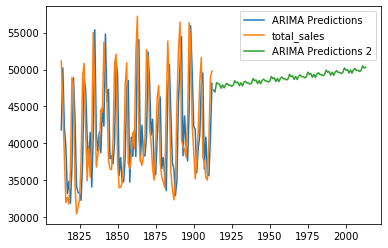

In [5]:
# SARIMA forecast
model = sm.tsa.SARIMAX(df, order=(2, 1, 0), seasonal_order=(0, 1, 1, 12))
results_SARIMA = model.fit()
print(results_SARIMA.summary())

print(df.shape)
train=df.iloc[:-100]
test=df.iloc[-100:]
print(train.shape,test.shape)

start=len(train)
end=len(train)+len(test)-1
pred=results_SARIMA.predict(start=start,end=end,typ='levels').rename('ARIMA Predictions')
pred.plot(legend=True)
test.plot(legend=True)

pred2=results_SARIMA.predict(start=len(df),end=len(df)+100,typ='levels').rename('ARIMA Predictions 2')
pred2.plot(legend=True)

# With 7 days average

Total nulls: 6
Dropping nulls...
                               SARIMAX Results                                
Dep. Variable:            total_sales   No. Observations:                 1907
Model:                 ARIMA(2, 1, 0)   Log Likelihood              -14858.928
Date:                Fri, 13 May 2022   AIC                          29723.855
Time:                        12:51:06   BIC                          29740.513
Sample:                             0   HQIC                         29729.987
                               - 1907                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3240      0.012     25.930      0.000       0.300       0.349
ar.L2          0.1152      0.020      5.631      0.000       0.075       0.155
sigma2      3.434e+

/home/khiem/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/khiem/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/khiem/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/khiem/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


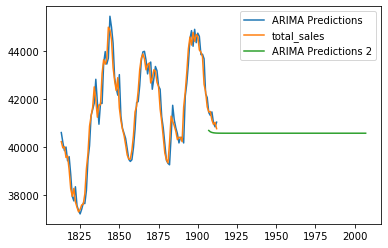

In [6]:
df = df.rolling(window=7).mean()

print("Total nulls:", df.isnull().sum())
print("Dropping nulls...")
df = df.dropna()
model = sm.tsa.arima.ARIMA(df, order=(2, 1, 0))
results_ARIMA = model.fit()
print(results_ARIMA.summary())

print(df.shape)
train=df.iloc[:-100]
test=df.iloc[-100:]
print(train.shape,test.shape)

start=len(train)
end=len(train)+len(test)-1
pred=results_ARIMA.predict(start=start,end=end,typ='levels').rename('ARIMA Predictions')
pred.plot(legend=True)
test.plot(legend=True)

pred2=results_ARIMA.predict(start=len(df),end=len(df)+100,typ='levels').rename('ARIMA Predictions 2')
pred2.plot(legend=True)

/home/khiem/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/khiem/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.91901D+00    |proj g|=  7.21041D-02


 This problem is unconstrained.



At iterate    5    f=  7.87860D+00    |proj g|=  3.43761D-03

At iterate   10    f=  7.87685D+00    |proj g|=  5.87989D-04

At iterate   15    f=  7.78033D+00    |proj g|=  2.86774D-02

At iterate   20    f=  7.77825D+00    |proj g|=  1.17861D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     20     25      1     0     0   1.179D-07   7.778D+00
  F =   7.7782496650929627     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
                                      SARIMAX Results                                       
Dep. Variable:                          total_sales   No. Observations:           

/home/khiem/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


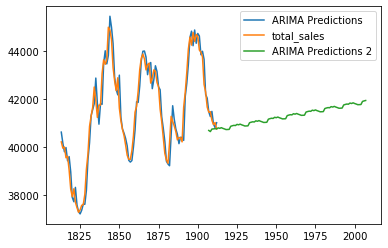

In [7]:
# SARIMA forecast
model = sm.tsa.SARIMAX(df, order=(2, 1, 0), seasonal_order=(0, 1, 1, 12))
results_SARIMA = model.fit()
print(results_SARIMA.summary())

print(df.shape)
train=df.iloc[:-100]
test=df.iloc[-100:]
print(train.shape,test.shape)

start=len(train)
end=len(train)+len(test)-1
pred=results_SARIMA.predict(start=start,end=end,typ='levels').rename('ARIMA Predictions')
pred.plot(legend=True)
test.plot(legend=True)

pred2=results_SARIMA.predict(start=len(df),end=len(df)+100,typ='levels').rename('ARIMA Predictions 2')
pred2.plot(legend=True)